<a href="https://colab.research.google.com/github/Charanpoojary/Project-13-MCdonalds-data-Customer-Segmentation-/blob/main/MCdonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries that is needed for the operations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive  # mounting our drive to google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Datasets/mcdonalds.csv'
dataset=pd.read_csv(file_path)            # reading the data

In [5]:
dataset.shape   # returns the shape of the dataset

(1453, 15)

In [6]:
dataset.head()   #returns the first 5 rows of the data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [10]:
dataset.tail()   #returns the bottom 5 rows of the data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [7]:
dataset.info()   # returns the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
dataset.describe()   # returns the description of numerical columns

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
dataset.isnull().sum()  #checking for the null values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

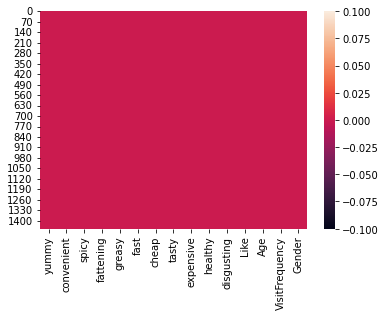

In [40]:
sns.heatmap(dataset.isnull()) # checking for null values in our dataset

In [41]:
# there are no null values in our dataset

In [13]:
dataset.columns    # returns the features in the dataset

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [17]:
# printing max and min age of the customer
print(dataset['Age'].max())
print(dataset['Age'].min())

71
18


In [21]:
# checking the number of male and female who visits the shop
print(dataset['Gender'].value_counts())

Female    788
Male      665
Name: Gender, dtype: int64


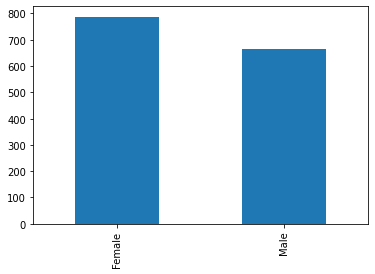

In [29]:
dataset['Gender'].value_counts().plot(kind='bar')   # here female count is more than male count

In [32]:
# checking the count of healthy and non healthy food   ( here yes represents healthy foood)
healthy_nonhealthy=dataset['healthy'].value_counts()
healthy_nonhealthy

No     1164
Yes     289
Name: healthy, dtype: int64

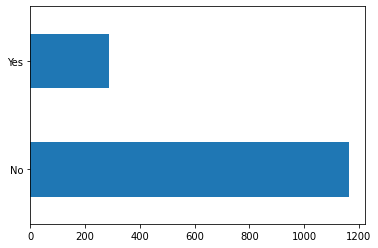

In [35]:
#healthy and non helathy                              ( here yes represents healthy foood)
healthy_nonhealthy.plot(kind='barh')

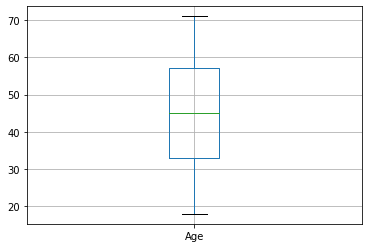

In [36]:
# here we can see the distribution of age ( most of the people who visits the shop are between 35-55)
dataset.boxplot('Age')

##  Now lets convert our string values into int

In [ ]:
# Encoding technique

In [ ]:
# we had only one numerical feature in our dataset

In [37]:
dataset.replace({'tasty':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'expensive':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'healthy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'disgusting':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'Like':{'I love it!+5':1,'I hate it!-5':2}},inplace=True)
dataset.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
dataset.replace({'yummy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'convenient':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'spicy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'fattening':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'greasy':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'fast':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'cheap':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'VisitFrequency':{'Every three months':1,'Never':0,'Once a month':2,'Once a year':3,'More than once a week':4,'Once a week':5}},inplace=True)

In [38]:
#lets print our dataset again
dataset.head()  # returns the top 5 rows of the datset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1


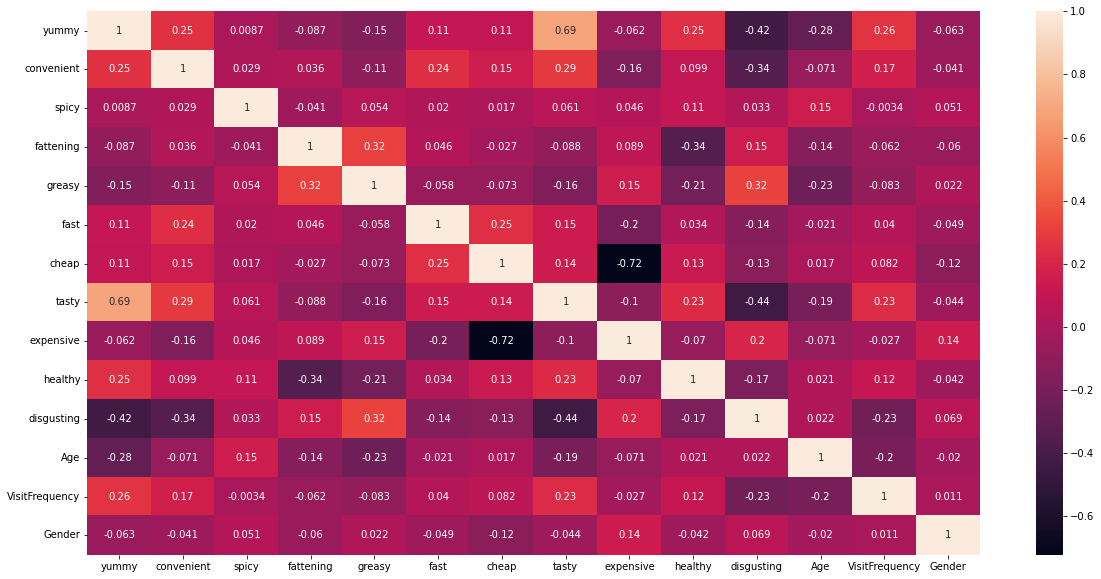

In [42]:
# Checking the correlation of the dataset
correlation=dataset.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlation,annot=True)

# **Modelling technique** 

In [ ]:
# kmeans algorithm

In [ ]:
# elbow method (how many clusters u should have)

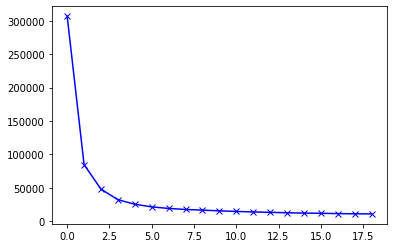

In [43]:
# elbow method graph ( for selecting the no of clusters )
from sklearn.cluster import KMeans
scores=[]
range_values=range(1,20)
for i in range_values:
  kmean = KMeans(n_clusters=i)
  kmean.fit(dataset)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

In [ ]:
# so here we can select three as our optimal cluster

In [ ]:
# applying kmeans algorithm

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(dataset)
label=kmeans.labels_

In [50]:
kmeans.cluster_centers_.shape

(3, 15)

In [51]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[dataset.columns])    # creating a dataframe

In [52]:
cluster_centers

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.424132,0.890311,0.140768,0.819013,0.425960,0.914077,0.628885,0.561243,0.294333,0.202925,0.243144,0.749543,59.691042,1.957952,0.433272
1,0.764423,0.935096,0.050481,0.915865,0.699519,0.915865,0.622596,0.788462,0.365385,0.182692,0.211538,1.586538,26.778846,2.718750,0.459135
2,0.516327,0.904082,0.077551,0.879592,0.491837,0.871429,0.544898,0.614286,0.422449,0.208163,0.269388,1.124490,42.897959,2.377551,0.483673


In [ ]:
# so now we have 3 group of customer

In [53]:
label.shape  # label will be assigned to our dataset(0-3)

(1453,)

In [54]:
# how the labels are assigned
L=kmeans.fit_predict(dataset) # use scaled data here
L

array([0, 0, 0, ..., 0, 1, 2], dtype=int32)

In [55]:
# here we are going to add the label to the original data(that is grouping(0-7))
final_data=pd.concat([dataset,pd.DataFrame({"cluster":label})],axis=1)
final_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2,47,3,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,5,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,2,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,1,1,2


In [57]:
# checkig the count of customer in each cluster
final_data['cluster'].value_counts()

0    547
2    490
1    416
Name: cluster, dtype: int64

In [ ]:
# principal component analysis  ( this is used to reduce the dimentionality)

In [ ]:
# dimentionality reduction

In [60]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(dataset)

In [61]:
pca_dataframe=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_dataframe   

,pca1,pca2
0,-16.515398,3.872631
1,-6.386759,-0.865520
2,-17.415240,-0.086065
3,-24.251485,-3.902710
4,-4.385727,-0.816761
...,...,...
1448,-2.363493,-0.791054
1449,8.676967,-1.255775
1450,-7.350829,-2.067146
1451,3.637581,-2.667255


In [62]:
pca_df=pd.concat([pca_dataframe,pd.DataFrame({'cluster':label})],axis=1)
pca_df

,pca1,pca2,cluster
0,-16.515398,3.872631,0
1,-6.386759,-0.865520,2
2,-17.415240,-0.086065,0
3,-24.251485,-3.902710,0
4,-4.385727,-0.816761,2
...,...,...,...
1448,-2.363493,-0.791054,2
1449,8.676967,-1.255775,2
1450,-7.350829,-2.067146,0
1451,3.637581,-2.667255,2


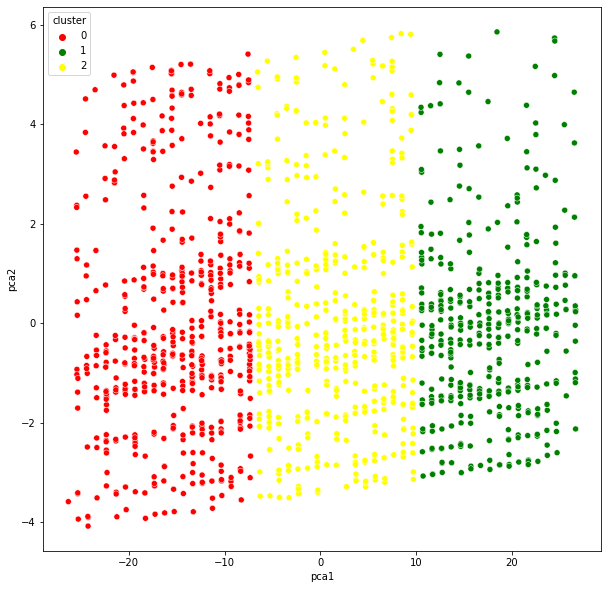

In [64]:
#ploting the scatterplot for the pca_df data(3 different clusters)
plt.figure(figsize=(10,10))
pca_df_plot=sns.scatterplot(x='pca1',y='pca2',hue="cluster",data=pca_df,palette=['red','green','yellow'])
plt.show()